This notebook contains a few exercises on NumPy and Scipy. 

Assigned readings:
* [A Visual Intro to NumPy and Data Representation](http://jalammar.github.io/visual-numpy) by Jay Alammar, **up to "Transposing and Reshaping**.
* [Scipy introduction](https://docs.scipy.org/doc/scipy/tutorial/general.html)
* [Scipy IO tutorial](https://docs.scipy.org/doc/scipy/tutorial/io.html)

Exercises marked with **!** require information not found in the assigned readings. To solve them you will have to explore the online documentations:
* [NumPy](https://numpy.org/doc/stable/user/index.html)
* [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

# Numpy

## Operations on 1D arrays

To practice with operations on 1D NumPy arrays, we will illustrate the law of large numbers.
Before we start, we will import the NumPy module and fix the random seed used in the random number generator - this ensures that we get the same results when rerunnig the code:

In [ ]:
import numpy as np

np.random.seed(0)

**Exercise 1.1.1**

Create a 1D array of 50 random numbers drawn from the uniform distribution in [0,1]. Determine the minimum, maximum and mean value in the array.

**Exercise 1.1.2**

Create a Python list with 100 elements where element $i$ is the mean of an array of $i$ elements drawn from the uniform distribution in [0,1].

Which one of the 5th, 50th and 100th element is closest to 0.5?

Assuming that the previous Python list is stored in a variable called `means`, its content can be plotted as follows:



In [ ]:
from matplotlib import pyplot as plt

plt.plot(means)

If all went well, the list should converge to 0.5!

## Operations on 2D arrays

We will practice operations on 2D NumPy arrays by manipulating 2D images. The Python Imaging Library (PIL) provides an easy way to load 2D images of various types in NumPy arrays. Here, we will practice with a PNG image representing the NumPy logo:

In [2]:
from PIL import Image
from pathlib import Path
import numpy as np

image = np.array(Image.open("numpy.png"))

NumPy arrays representing images can easily be shown with Matplotlib:

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(image)

**Exercise 1.2.1**

Determine the size of the image (number of pixels in x and y dimension).

**Exercise 1.2.2**

Plot the bottom half of the image, i.e., the lines from x=250 on.

**! Exercise 1.2.3**

Write a program to remove the whitespace around the image, i.e. crop the image.

**! Exercise 1.2.4**

Using NumPy's `linalg` module, solve the equation **Ax** = **b**, where:

$$
\textbf{A}=
\begin{bmatrix}
8 & -6 & 2\\
-4 & 11 & -7\\
4 & -7 & 6
\end{bmatrix}
\quad
\mathrm{and} \quad \textbf{b} = \begin{bmatrix}
28\\
-40\\
33
\end{bmatrix}
$$

Determine the inverse of **A**

# Scipy


**Exercise 3.1**

A colleague of yours who uses MATLAB sent you data in the mat file `points.mat`. Load this file and retrieve the x and y arrays in it. Using matplotlib, plot the (x, y) points.

**Exercise 3.2**

Using Scipy's `interpolate` module, interpolate the datapoints using (1) nearest neighbors, and (2) cubic splines. Plot the interpolants.

**Exercise 3.3**

Using Scipy's `integrate` module, determine the integral (area under the curve) of the interpolants between 1 and 10. Do so using one or both of the interpolation functions previously calculated.

**Bonus Exercise**

In [6]:
from scipy import ndimage

In [7]:
def smooth(img, sigma=2):
    """Create a copy of image smoothed with a Gaussian filter."""
    # TODO
    # Hint: look for scipy.ndimage.gaussian_filter
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html
    #
    # Hint: if img is 3D, we don't want to smooth along the last dimension...
    # `gaussian_filter` allows specifying a different `sigma` for each
    # dimension.
    # TODO_BEGIN

    # TODO_END

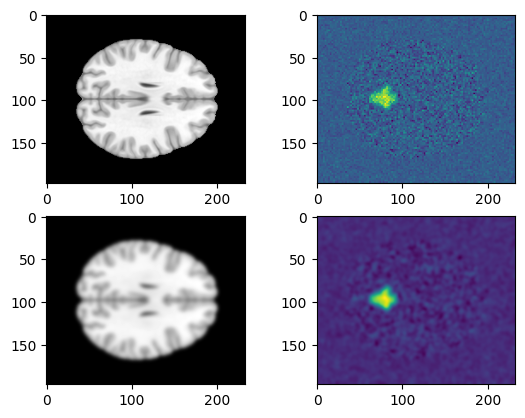

In [4]:
images = np.load("images.npz")
template = images["mni_template"]
smoothed_template = smooth(template)

fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(template, cmap="gray")
axes[1, 0].imshow(smoothed_template, cmap="gray")

img = images["difumo"]
axes[0, 1].imshow(img[..., 3])
smoothed_img = smooth(img)
axes[1, 1].imshow(smoothed_img[..., 3])
for i in range(5):
    assert np.allclose(smoothed_img[..., i], smooth(img[..., i]))

plt.show()